# Project: Wrangling and Analysing twitter archive - WeRateDogs.

## Table of Contents
 1. [Introduction](#Introduction)
 2. Data Gathering:
 - [WeRateDogs Twitter Archive](#The-WeRateDogs-Twitter-archive)
 - [Tweet Image Predictions](#Tweet-Image-Predictions)
 - [Additional data from Twitter API](#Additional-data-from-Twitter-API)
 3. [Assessing data](#ASSESSING-DATA)
 4.  [Cleaning Data](#CLEANING-DATA)
 5. [Storing Data](#STORING-DATA)
 6. [Analysing and Visualising Data](#ANALYSING-AND-VISUALISING-DATA)
 7. [Conclusion](#Conclusions:)

## Introduction

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. This project required us to collect three individual datasets via different methods, assess and clean each dataset and finally draw insights from our analysis.

### Data Gathering:

The data gathering process begins by downloading, uploading and reading each dataset into individual pandas DataFrame.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import tweepy
from functools import reduce
import json
import os
import re
from pprint import pprint

## The WeRateDogs Twitter archive

This CSV file which was provided ws read into a pandas dataframe using .csv

In [2]:
Archive=pd.read_csv('twitter-archive-enhanced.csv')

## Tweet Image Predictions

This dataset was downloaded programatically using the requests library and written into a local file.

In [3]:
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
response.status_code
response.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [4]:
with open ('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)

This file type is tab-separated thus the code requires a specification of the delimiter

In [5]:
Image_predictions=pd.read_csv('image-predictions.tsv', sep='\t')

## Additional data from Twitter API


This last piece of data is gathered by querying Twitter API for each tweet in the Twitter archive and saving JSON in a text file.

In [6]:
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


Next, Twitter's API is queried  for the JSON data of each tweet in the twitter archive.
- *Note: The JSON file used was that provided by the Udacity team*

To read the JSON text file,

In [7]:
tweet_dict= {'id':[],'retweet_count':[], 'favorite_count':[],'followers_count':[] }
tweet_dict.values()

dict_values([[], [], [], []])

In [8]:
with open('tweet-json.txt', 'r', encoding='utf8') as f:
    l1 =f.readline()
    pprint(l1)

('{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, '
 '"id_str": "892420643555336193", "full_text": "This is Phineas. He\'s a '
 'mystical boy. Only ever appears in the hole of a donut. 13/10 '
 'https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], '
 '"entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], '
 '"media": [{"id": 892420639486877696, "id_str": "892420639486877696", '
 '"indices": [86, 109], "media_url": '
 '"http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": '
 '"https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": '
 '"https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", '
 '"expanded_url": '
 '"https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": '
 '"photo", "sizes": {"large": {"w": 540, "h": 528, "resize": "fit"}, "thumb": '
 '{"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 540, "h": 528, '
 '"resize": "fit"}, "medium": {"w": 540, "

Three custom functions were created to specifically gather each tweet's favorite count, retweet count and followers count from the downloaded JSON file and store them in a pandas dataframe.

In [9]:

def cleaning(data):
    """ cleans data"""
    regex= re.compile('[^0-9]')
    data= regex.sub('', data)
    data= int(data)
    
    return data

In [10]:
def extract(line,val):
    """Extracts a given value from each line
    @param line: str object
    @param val: str
    @return: str
    """
    start_ind = line.find(val)
    stop_ind = line.find(',', start_ind)
    data = line[start_ind:stop_ind]
    data = cleaning(data)
    return data

In [11]:
with open('tweet-json.txt', 'r', encoding='utf8') as f:
    while True:
        line= f.readline()
        tweet_dict['id'].append(extract(line,'id'))
        tweet_dict['retweet_count'].append(extract(line,'retweet_count')) 
        tweet_dict['favorite_count'].append(extract(line,'favorite_count')) 
        tweet_dict['followers_count'].append(extract(line,'followers_count')) 
        
        if not line:
            break
        print("Line{}: {}".format('count',line.strip()))

Linecount: {"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"large": {"w": 540, "h": 528, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "medium": {"w": 540, "h": 528, "resize": "fit"}}}]}, "extended_entitie

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



ValueError: invalid literal for int() with base 10: ''

In [16]:
TweetApi=pd.DataFrame({key:pd.Series(value) for key, value in tweet_dict.items()} )

# ASSESSING DATA

In this section, gathered data is assessed visually and programatically and detected issues are documented based on quality and tidiness.

In [17]:
Archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [18]:
Image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [19]:
TweetApi

,id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
...,...,...,...,...
2349,666049248165822465,41,111,3201018
2350,666044226329800704,147,311,3201018
2351,666033412701032449,47,128,3201018
2352,666029285002620928,48,132,3201018


In [20]:
Archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [21]:
Archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
782,775364825476165632,NaN,NaN,2016-09-12 16:05:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Finley. He's an independent doggo stil...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775364825...,11,10,Finley,doggo,None,None,None
2063,671159727754231808,NaN,NaN,2015-11-30 02:52:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Anthony. He just finished up his maste...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671159727...,5,10,Anthony,None,None,None,None
2173,669324657376567296,NaN,NaN,2015-11-25 01:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ralf. He's a miniature Buick DiCaprio. Ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669324657...,11,10,Ralf,None,None,None,None
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
131,867051520902168576,NaN,NaN,2017-05-23 16:16:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Oh my this spooked me up. We only rate dogs, n...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867051520...,13,10,None,None,None,None,None


In [22]:
Archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [23]:
Image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [24]:
Image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1667,812781120811126785,https://pbs.twimg.com/media/C0eUHfWUAAANEYr.jpg,1,bull_mastiff,0.989316,True,boxer,0.007043,True,French_bulldog,0.001740,True
1252,747963614829678593,https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg,1,kelpie,0.307672,True,Irish_terrier,0.197486,True,dingo,0.105475,False
1928,858107933456039936,https://pbs.twimg.com/media/C-icm_WXUAAmuRR.jpg,1,golden_retriever,0.863874,True,Labrador_retriever,0.015920,True,doormat,0.010615,False
948,704819833553219584,https://pbs.twimg.com/media/CcgF5ovW8AACrEU.jpg,1,guinea_pig,0.994776,False,hamster,0.004069,False,wood_rabbit,0.000206,False
1091,719367763014393856,https://pbs.twimg.com/media/Cfu1KSRXEAACC5X.jpg,1,swing,0.171486,False,soft-coated_wheaten_terrier,0.050971,True,Tibetan_terrier,0.047759,True


In [25]:
Image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [26]:
TweetApi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   favorite_count   2354 non-null   int64
 3   followers_count  2354 non-null   int64
dtypes: int64(4)
memory usage: 73.6 KB


In [27]:
TweetApi.sample(5)

,id,retweet_count,favorite_count,followers_count
2006,672256522047614977,1699,2999,3201006
1769,678334497360859136,304,1427,3200954
1016,746818907684614144,1944,5807,3200943
1622,684880619965411328,936,2305,3200950
730,781655249211752448,1314,4466,3200901


In [28]:
TweetApi.nunique()

id                 2354
retweet_count      1722
favorite_count     2027
followers_count      66
dtype: int64

In [29]:
all_columns = pd.Series(list(Archive) + list(Image_predictions) + list(TweetApi))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

In [30]:
Archive.tweet_id.sort_values()

2355    666020888022790149
2354    666029285002620928
2353    666033412701032449
2352    666044226329800704
2351    666049248165822465
               ...        
4       891327558926688256
3       891689557279858688
2       891815181378084864
1       892177421306343426
0       892420643555336193
Name: tweet_id, Length: 2356, dtype: int64

In [31]:

Image_predictions.tweet_id.sort_values()

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
               ...        
2070    891327558926688256
2071    891689557279858688
2072    891815181378084864
2073    892177421306343426
2074    892420643555336193
Name: tweet_id, Length: 2075, dtype: int64

In [32]:
TweetApi.id.sort_values()

2353    666020888022790149
2352    666029285002620928
2351    666033412701032449
2350    666044226329800704
2349    666049248165822465
               ...        
4       891327558926688256
3       891689557279858688
2       891815181378084864
1       892177421306343426
0       892420643555336193
Name: id, Length: 2354, dtype: int64

#### Archive table:
Quality:
1. null values in 'in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id' and 'retweeted_status_timestamp' columns
2. timestamp datatype is string instead of datetime
3. tweet_id is integer instead of string
4. some dog names are missing or invalid (e.g. a, an)
5. new dog_type column datatype object instead of category
6. new dog_ratings column datatype object instead of integer

#### Image Predictions:
Quality:
1. tweet_id is integer instead of string

#### TweetApi:
Quality:
1. 'id' column is integer instead of string
2. Change 'id' name to 'tweet_id'

Tidiness:
1. Remove retweets
2. Merge TweetApi and Image Predictions tables with Archive table
3. Create new column for dog ratings from text column
4. Create a single column for dog type
5. 'text' column contains two variables: tweet text and a url
6. Drop duplicate rows


## CLEANING DATA


Copies of each data set is created.

In [33]:
df_clean_1 = Archive.copy()
df_clean_2 = Image_predictions.copy()
df_clean_3 = TweetApi.copy()


The cleaning process begins with:
   - Completeness/Missing Data: Where null values are filled or removed
   - Tidiness
   - Quality

### Missing Data
Null values cannot be filled because there is no way to access this information.

### Tidiness

#### Define (1)

Remove rows containing retweets in archive table using .isnull()

#### Code (1)

In [34]:
df_clean_1 = df_clean_1[df_clean_1.retweeted_status_id.isnull()]
df_clean_1 = df_clean_1[df_clean_1.retweeted_status_user_id.isnull()]
df_clean_1 = df_clean_1[df_clean_1.retweeted_status_timestamp.isnull()]

#### Test(1)

In [35]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### Define (2)
1. Merge Image Predictions tables with Archive table.
2. Merge TweetApi with New Archive table. Join all three tables on 'tweet_id'

     *Note: To achieve this, a quality issue has to be attended to first. 'id' name in the TweetApi table should be changed to 'tweet_id'.*

#### Code (2)

In [36]:
 df_clean_3.rename(columns = {'id':'tweet_id'}, inplace = True)

In [37]:
new_archive_df = pd.merge(pd.merge(df_clean_1,df_clean_2, on = 'tweet_id'), df_clean_3, on = 'tweet_id')

#### Test (2)

In [38]:
new_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,followers_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,3200889
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,3200889
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,3200889
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,3200889
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,3200889


In [39]:
new_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  doggo                       1994 

#### Define(3)

- Extract the url from the text column using regular expressions and pandas' str.extract method.
- Drop 'jpg url'

#### Code(3)

In [40]:
# extract 'image url' from text column
new_archive_df['image_url'] = new_archive_df.text.str.extract('(https://[a-z]+\.+[a-z.]+/+[a-zA-Z0-9]+)', expand=True)
# drop 'jpg_url'
new_archive_df = new_archive_df.drop('jpg_url', axis= 1)

#### Test(3)

In [41]:
new_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,followers_count,image_url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,8853,39467,3200889,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,3200889,https://t.co/0Xxu71qeIV
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,3200889,https://t.co/wUnZnhtVJB
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,3200889,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,3200889,https://t.co/AtUZn91f7f


#### Define(4)

- Extract dog type from 'text column'
- Create new column for 'dog type'
- Drop individual dog type columns (i.e. doggo, floofer, etc)

#### Code(4)

In [42]:
# Extract dog type using regular expressions
new_archive_df['dog_stage'] = new_archive_df.text.str.extract('(doggo|floofer|pupper|puppo)', expand=True)
# Drop individual dog type columns
new_archive_df = new_archive_df.drop(['doggo','floofer','pupper','puppo'], axis=1)


#### Test(4)

In [43]:
new_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  img_num                     1994 

#### Define (5)
- extract the numerator from 'text' column
- drop previous numerator column

#### Code (5)

In [44]:
#Extract the numerator from 'text' column
new_archive_df['dog_ratings'] = new_archive_df.text.str.extract('([0-9]+)', expand=True)

In [45]:
#drop previous numerator column
new_archive_df = new_archive_df.drop('rating_numerator', axis=1)

#### Test (5
)

In [46]:

new_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_denominator          1994 non-null   int64  
 11  name                        1994 non-null   object 
 12  img_num                     1994 non-null   int64  
 13  p1                          1994 

#### Define (6)
 - drop duplicate rows using 'image_url' column
 - drop unnecessary columns

#### Code (6)

In [47]:
# drop duplicate rows by 'image_url' column
new_archive_df.drop_duplicates(['image_url'], keep='last', inplace = True)

In [48]:
# drop unnecessary columns
new_archive_df = new_archive_df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'], axis=1)

#### Test (6)

In [49]:
sum(new_archive_df.duplicated())

0

In [50]:
new_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   expanded_urls       1994 non-null   object 
 5   rating_denominator  1994 non-null   int64  
 6   name                1994 non-null   object 
 7   img_num             1994 non-null   int64  
 8   p1                  1994 non-null   object 
 9   p1_conf             1994 non-null   float64
 10  p1_dog              1994 non-null   bool   
 11  p2                  1994 non-null   object 
 12  p2_conf             1994 non-null   float64
 13  p2_dog              1994 non-null   bool   
 14  p3                  1994 non-null   object 
 15  p3_conf             1994 non-null   float64
 16  p3_dog

### Quality

#### Define(1)

- change timestamp datatype from object to datetime
- change tweet_id datatype from integer to string
- change dog_type datatype from object to category
- change dog_ratings datatype from object to integer

#### Code(1)

In [51]:
# change timestamp to datetime
new_archive_df.timestamp = pd.to_datetime(new_archive_df.timestamp)
# change tweet_id to string
new_archive_df.tweet_id = new_archive_df.tweet_id.astype(str)
# change dog_stage to category
new_archive_df.dog_stage = new_archive_df.dog_stage.astype('category')
# change dog_ratings to integer
new_archive_df.dog_ratings = new_archive_df.dog_ratings.astype(int)

#### Test(1)

In [52]:
new_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_denominator  1994 non-null   int64              
 6   name                1994 non-null   object             
 7   img_num             1994 non-null   int64              
 8   p1                  1994 non-null   object             
 9   p1_conf             1994 non-null   float64            
 10  p1_dog              1994 non-null   bool               
 11  p2                  1994 non-null   object             
 12  p2_conf             1994 non-null 

#### Define (2)

Change invalid dog names to "None"

#### Code (2)

In [53]:
new_archive_df['name'] = new_archive_df['name'].replace(['a','an','very', 'such', 'quite', 'not'],'None')

#### Test (2)

In [54]:
new_archive_df['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
1989        None
1990        None
1991        None
1992        None
1993        None
Name: name, Length: 1994, dtype: object

## STORING DATA

In [55]:
new_archive_df.to_csv('twitter_archive_master.csv', index= False)



## ANALYSING AND VISUALISING DATA


After assessing and cleaning the dataset, we analyse and visualise the wrangled data. We use the describe function to obtain summary statistics from numeric aspects of the dataframe

In [56]:
new_archive_df.describe()

,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count,followers_count,dog_ratings
count,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03,1994.000000,1994.000000,1.994000e+03,1994.000000
mean,10.532096,1.203109,0.593941,1.344195e-01,6.024848e-02,2766.753260,8895.725677,3.200946e+06,18.764293
std,7.320710,0.560777,0.271954,1.006807e-01,5.089067e-02,4674.698447,12213.193181,4.478196e+01,117.074113
min,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000,3.200799e+06,0.000000
25%,10.000000,1.000000,0.362857,5.393987e-02,1.619283e-02,624.750000,1982.000000,3.200901e+06,10.000000
50%,10.000000,1.000000,0.587635,1.174550e-01,4.950530e-02,1359.500000,4136.000000,3.200947e+06,11.000000
75%,10.000000,1.000000,0.846285,1.951377e-01,9.159438e-02,3220.000000,11308.000000,3.201002e+06,12.000000
max,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000,3.201018e+06,2016.000000


In [57]:
new_archive_df_1= (new_archive_df.loc[new_archive_df['p1_conf'] == 1])

From the summary of statistics above, the first prediction confidence shows a 1.0 max probablity which means the model was 100% sure in its prediction. The location showed the first and third predictions as a "jigsaw puzzle" and a "doormat". Further analysis using the image_url to the WeRatesDog twitter page shows that the prediction was false as there was a dog named Shaggy in the image but the jigsaw puzzle took up most of the image and likely led to the first prediction.

In [58]:
print(new_archive_df_1.loc[new_archive_df['dog_ratings'] == '2016'])

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_denominator, name, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, retweet_count, favorite_count, followers_count, image_url, dog_stage, dog_ratings]
Index: []

[0 rows x 23 columns]


The summary statistics shows mean dog ratings of 12 and a maximum of 2195. The maximum number is too far from the mean dog ratings and could be an outlier when plotted.
When queried however, the row returned an empty dataframe.















### Questions


1. Which dog stage is most popular?
2. How did favourite and retweet count improve over time?

### 1. Which dog stage is most popular?

In [59]:
base_color= sns.color_palette()[0]

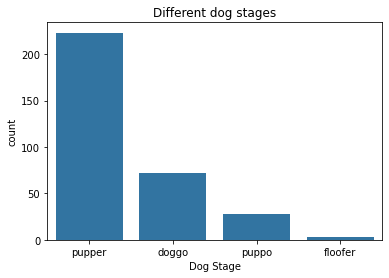

In [65]:
freq=new_archive_df['dog_stage'].value_counts()
gen_order= freq.index
sns.countplot(data= new_archive_df,x='dog_stage',color=base_color,order=gen_order)
plt.ylabel ("count")
plt.xlabel ("Dog Stage")
plt.title("Different dog stages");


The bar chart above shows that "pupper" is the most popular dog stage.

### 2. How did favorite and retweet count improve over time?

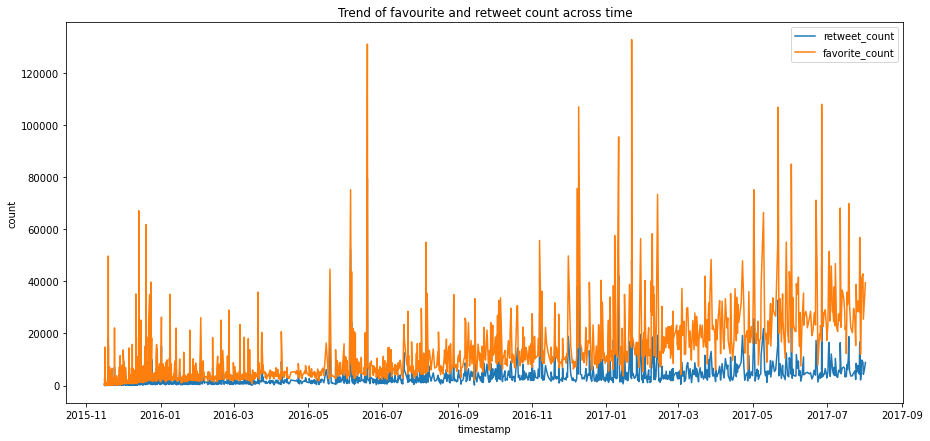

In [63]:
plt.figure(figsize = [15,7])
ax = sns.lineplot(x='timestamp', y='retweet_count', data=new_archive_df)
ax1 = sns.lineplot(x='timestamp', y='favorite_count', data=new_archive_df)

plt.ylabel ("count")
plt.xlabel ("timestamp")
plt.title("Trend of favourite and retweet count across time")
plt.legend(["retweet_count", "favorite_count"])
plt.show()

Observing the trend above, it can be noticed that retweet and favourite count remain relatively the same in the beginning with a few outliers in favourite count. At about September 2016 into 2017, the favourite count increases significantly up to 30000 in number with little change in retweet count.

## Conclusions:

1. Pupper was the most frequent dog stage posted in the WeRateDogs twitter page
2. Retweet and follower counts increased over time with favourite count having more significant increase around the end of 2016
3. Some of the predictions were not as accurate

### Limitations:

Null values could not be filled because there was no way to access this information